# Example Vignette

To use `hpapiwrapper` in a project:

In the Example below I will be showing one way that the House Plant API client can be used to analyze data and show an interesting story.

This notebook shows the steps one can take to loag in the package, obtain key pieces of information, and gather insights. 

### Analysis Objective: 
In this analysis we will use the House Plants API Client to learn more about all the recorded samples for Palm plants. I am considering getting a Palm plant and want to quickly get an idea of their characteristics. 

## Installing Package and Dependencies

In [14]:
pip install hpapiwrapper

Note: you may need to restart the kernel to use updated packages.


In [22]:
from hpapiwrapper import hpapiwrapper 

In [23]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import json
from json import dumps, loads
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import pytest

## Load in Personal Key

In [24]:
load_dotenv()
key = os.getenv('key')

## Get the dataframe and clean it

First we will use the get_houseplant_df module to get a dataframe with all of the house plant sample data. 

In [30]:
df = hpapiwrapper.get_houseplant_df(key)

In [31]:
df.head()

,Categories,Disease,Use,Latin name,Insects,Avaibility,url,Style,Bearing,Light tolered,...,Height potential.cm,Temperature max.F,Temperature max.C,Temperature min.F,Temperature min.C,Pot diameter (cm).m,Pot diameter (cm).cm,Width potential,Height potential,Temperature min
0,Dracaena,N/A,"[Potted plant, Secondary]",Dracaena deremensis 'Janet Craig',"[Mealy bug, Scale]",Regular,http://www.tropicopia.com/house-plant/detail.n...,Bush,Erect,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,366.0,86.0,30,50.0,10.0,0.25,25,NaN,NaN,NaN
1,Palm,N/A,"[Potted plant, Secondary]",Rhapis excelsa,[N/A],Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,366.0,86.0,30,46.4,8.0,0.25,25,NaN,NaN,NaN
2,Anthurium,Erwinia & Crown rot,"[Flower, Table top, Tertiary]",Anthurium X,"[Spider mite, Mealy bug, Aphid]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,61.0,71.6,22,64.4,18.0,0.15,15,NaN,NaN,NaN
3,Other,Phytophtora & Crown rot,"[Colors / Forms, Table top, Tertiary]",Alocasia X amazonica,"[Spider mite, Mealy bug]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,152.0,82.4,28,59.0,15.0,0.15,15,NaN,NaN,NaN
4,Dracaena,N/A,"[Potted plant, Primary]",Dracaena reflexa 'Song of Jamaica',[Mealy bug],Regular,http://www.tropicopia.com/house-plant/detail.n...,Multi,Arborescent,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,610.0,86.0,30,53.6,12.0,0.36,36,NaN,NaN,NaN


Next we clean the dataframe to remove all columns where all of the values are NaN (and hence do not offer any valuable information). 

In [34]:
clean_df = df.dropna(axis='columns', how = 'all')

In [35]:
clean_df.head()

,Categories,Disease,Use,Latin name,Insects,Avaibility,url,Style,Bearing,Light tolered,...,Width potential.m,Width potential.cm,Height potential.m,Height potential.cm,Temperature max.F,Temperature max.C,Temperature min.F,Temperature min.C,Pot diameter (cm).m,Pot diameter (cm).cm
0,Dracaena,N/A,"[Potted plant, Secondary]",Dracaena deremensis 'Janet Craig',"[Mealy bug, Scale]",Regular,http://www.tropicopia.com/house-plant/detail.n...,Bush,Erect,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,1.22,122.0,3.66,366.0,86.0,30,50.0,10.0,0.25,25
1,Palm,N/A,"[Potted plant, Secondary]",Rhapis excelsa,[N/A],Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,3.05,305.0,3.66,366.0,86.0,30,46.4,8.0,0.25,25
2,Anthurium,Erwinia & Crown rot,"[Flower, Table top, Tertiary]",Anthurium X,"[Spider mite, Mealy bug, Aphid]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,0.61,61.0,0.61,61.0,71.6,22,64.4,18.0,0.15,15
3,Other,Phytophtora & Crown rot,"[Colors / Forms, Table top, Tertiary]",Alocasia X amazonica,"[Spider mite, Mealy bug]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,0.91,91.0,1.52,152.0,82.4,28,59.0,15.0,0.15,15
4,Dracaena,N/A,"[Potted plant, Primary]",Dracaena reflexa 'Song of Jamaica',[Mealy bug],Regular,http://www.tropicopia.com/house-plant/detail.n...,Multi,Arborescent,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,3.05,305.0,6.10,610.0,86.0,30,53.6,12.0,0.36,36


Now we can look at interesting information about Palm plants specifically. Lets look only at Palm tree related data in the clean dataframe.

In [37]:
clean_palms = clean_df.loc[clean_df['Categories'] == 'Palm']

In [38]:
clean_palms.head()

,Categories,Disease,Use,Latin name,Insects,Avaibility,url,Style,Bearing,Light tolered,...,Width potential.m,Width potential.cm,Height potential.m,Height potential.cm,Temperature max.F,Temperature max.C,Temperature min.F,Temperature min.C,Pot diameter (cm).m,Pot diameter (cm).cm
1,Palm,N/A,"[Potted plant, Secondary]",Rhapis excelsa,[N/A],Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,3.05,305.0,3.66,366.0,86.0,30,46.4,8.0,0.25,25
15,Palm,N/A,"[Potted plant, Tertiary]",Chamaedorea elegans,"[Spider mite, Mealy bug, Scale]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,1.02,102.0,1.02,102.0,82.4,28,41.0,5.0,0.20,20
21,Palm,N/A,"[Potted plant, Primary]",Caryota mitis,"[Spider mite, Mealy bug]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Erect,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,3.66,366.0,15.24,1524.0,77.0,25,50.0,10.0,0.36,36
22,Palm,N/A,"[Potted plant, Secondary]",Chamaedorea erumpens,"[Spider mite, Mealy bug]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,1.83,183.0,2.44,244.0,82.4,28,50.0,10.0,0.25,25
40,Palm,N/A,"[Potted plant, Tertiary]",Chamaedorea elegans,"[Spider mite, Mealy bug, Scale]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,1.02,102.0,1.02,102.0,82.4,28,41.0,5.0,0.25,25


Below we found the following information about Palm trees:
- They are either Clump bearing or Erect Bearing 
- There are certain varities of Palm houseplants that are regularly, rarely, and more or less available. 
- The Latin names for the different species of Palm plants available are as follows: 
    - Rhapis excelsa
    - Chamaedorea elegans
    - Caryota mitis
    - Chamaedorea erumpens 
    - Howea forsteriana 
    - Chamaedorea metallica
    - Veitchia merrillii 
    - Hyophorbe verschaffeltii 
    - Syagrus schizophylla 
    - Licuala spinosa 
    - Ravenea rivularis 
    - Cycas revoluta 
    - Phoenix roebellinii 

In [39]:
clean_palms.Bearing.unique()

array(['Clump', 'Erect'], dtype=object)

In [41]:
clean_palms.Avaibility.unique()

array(['Regular', 'Rare', 'More or less regular'], dtype=object)

In [44]:
clean_palms['Latin name'].unique()

array(['Rhapis excelsa', 'Chamaedorea elegans', 'Caryota mitis',
       'Chamaedorea erumpens', 'Chamaedorea seifrizii',
       'Dypsis lutescens', 'Howea forsteriana', 'Chamaedorea metallica',
       'Veitchia merrillii', 'Hyophorbe verschaffeltii',
       'Syagrus schizophylla', 'Licuala spinosa', 'Ravenea rivularis',
       'Cycas revoluta', 'Phoenix roebellinii'], dtype=object)

## Gather insights for individual Palm plants

Lets gather interesting insights for Palm plants only using the get_houseplant_ids and get_houseplant_byid modules. 

First lets get a dataframe with all of the Palm plants and their associated ids. 

In [45]:
df2 = hpapiwrapper.get_houseplant_ids(key, 'Palm')

In [46]:
df2

,id,Categories
1,9b97aef1-20a4-5620-af90-7d64dadb414e,Palm
15,cb4a3ce5-4d8b-5598-b9dc-60c5b6492e1a,Palm
21,8ba5d93c-84c6-5a7b-8f81-41b5465dff88,Palm
22,d38db4db-0cdb-5ce3-afd2-e094e3881e28,Palm
40,bd08169e-73b5-58ac-b75d-d9a2870f6960,Palm
41,2655164e-f2be-5021-bf8a-7aa56a6d290b,Palm
51,c9697ff8-b0c4-5a87-aff1-eb7437dd4ac0,Palm
98,200d6e4f-a42f-5c26-9b00-dfc774af68c3,Palm
106,0130a54a-28e5-5034-9892-6b4cdef1bbbf,Palm
107,21528bca-39c4-5046-a8d4-d6e96910a631,Palm


Now that we have all the ids associated with Palm plants, we can use the get_houseplant_byid module to utilize the API's option to look at specific plants based on their ids. Below we look at the first three palm samples in the dataset. We can now compare these three individual samples. This is helpful information because although these are all Palm plants, each sample is it's own observation and can differ. We see that when comparing palm1, palm2, and palm3 that palm3 has the heighest height and width potential. 

In [47]:
palm1 = hpapiwrapper.get_houseplant_byid(key, '9b97aef1-20a4-5620-af90-7d64dadb414e')

In [48]:
palm2 = hpapiwrapper.get_houseplant_byid(key, 'cb4a3ce5-4d8b-5598-b9dc-60c5b6492e1a')

In [50]:
palm3 = hpapiwrapper.get_houseplant_byid(key, '8ba5d93c-84c6-5a7b-8f81-41b5465dff88')

In [51]:
palm1

,Categories,Disease,Use,Latin name,Insects,Avaibility,url,Style,Bearing,Light tolered,...,Width potential.m,Width potential.cm,Height potential.m,Height potential.cm,Temperature max.F,Temperature max.C,Temperature min.F,Temperature min.C,Pot diameter (cm).m,Pot diameter (cm).cm
0,Palm,N/A,"[Potted plant, Secondary]",Rhapis excelsa,[N/A],Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,3.05,305,3.66,366,86,30,46.4,8,0.25,25


In [52]:
palm2

,Categories,Disease,Use,Latin name,Insects,Avaibility,url,Style,Bearing,Light tolered,...,Width potential.m,Width potential.cm,Height potential.m,Height potential.cm,Temperature max.F,Temperature max.C,Temperature min.F,Temperature min.C,Pot diameter (cm).m,Pot diameter (cm).cm
0,Palm,N/A,"[Potted plant, Tertiary]",Chamaedorea elegans,"[Spider mite, Mealy bug, Scale]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Clump,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,1.02,102,1.02,102,82.4,28,41,5,0.2,20


In [53]:
palm3

,Categories,Disease,Use,Latin name,Insects,Avaibility,url,Style,Bearing,Light tolered,...,Width potential.m,Width potential.cm,Height potential.m,Height potential.cm,Temperature max.F,Temperature max.C,Temperature min.F,Temperature min.C,Pot diameter (cm).m,Pot diameter (cm).cm
0,Palm,N/A,"[Potted plant, Primary]",Caryota mitis,"[Spider mite, Mealy bug]",Regular,http://www.tropicopia.com/house-plant/detail.n...,None,Erect,"Diffuse light ( Less than 5,300 lux / 500 fc)",...,3.66,366,15.24,1524,77,25,50,10,0.36,36


## Lets Map Height and Width comparisons and look at some averages 

Finally, we will utilize the get_houseplant_plot and get_houseplant_means modules in order to visualize some of the variety of heights and widths for certain plant categories and also understand what the average values are for those categories. 

We see from the module results below that there is a general positive increase for plant height with plant width for palms (althought we cannot make any conslusions based purely on this one plot). In addition, the second module shows that on average the plants have an average height at purchase of 130 cm and average width at purchase of 103 cm. Their average maximum temperature is 84 F and average minimum is 49 F. Finally, we see that the average pot diameter is 30 cm. With this information, we can get an idea of the approximate sizes of palms we may see at a plant shop or nursery. 

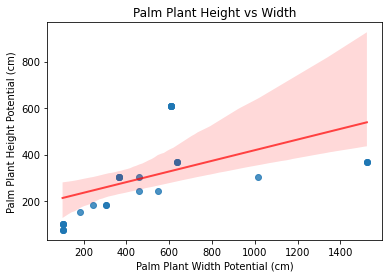

In [54]:
hpapiwrapper.get_houseplant_plot(key, 'Palm')

In [55]:
hpapiwrapper.get_houseplant_means(key, "Palm")

Average Potential Height in cm: 511 cm
Average Potential Width in cm: 307 cm
Average Height at Purchase in cm: 130 cm
Average Width at Purchase in cm: 103 cm
Average Maximum Temperature in F: 84 F
Average Minimum Temperature in F: 49 F
Average pot diameter in cm: 30 cm
